**Importing Necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data which is in csv form**

In [2]:
# Reading the dataset
df= pd.read_csv('/kaggle/input/marketing-dataset/marketing_data.csv') 
df.head(5) # Top 5 rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


**Exploring the dataset shapes and datatypes.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Are there any null values or outliers? How will you handle them?**

In [4]:
# Handling null values and identifying outliers

# Checking for null values
null_counts = df.isnull().sum()
print('Null counts per column:\
', null_counts)

# Handling null values in ' Income ' column
median_income = df[' Income '].median()
df[' Income '] = df[' Income '].fillna(median_income)
print('Null values in Income column after imputation:', df[' Income '].isnull().sum())

Null counts per column: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
Null values in Income column after imputation: 0


**Null values are present in the 'Income' column, with 24 missing values.
To handle null values, the median income is calculated and used to fill in the missing values.**

In [5]:
# Identifying outliers using IQR for the 'Income' column
Q1 = df[' Income '].quantile(0.25)
Q3 = df[' Income '].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[' Income '] < lower_bound) | (df[' Income '] > upper_bound)][' Income ']
print('Outliers in Income column:', outliers.describe())

Outliers in Income column: count         8.000000
mean     221604.500000
std      179850.404431
min      153924.000000
25%      157090.500000
50%      157488.000000
75%      161201.500000
max      666666.000000
Name:  Income , dtype: float64


**Outliers in the 'Income' column are described above, with some incomes significantly higher than the average, suggesting a few very high earners in the dataset.**

**Question 2: What factors are significantly related to the number of web purchases?**

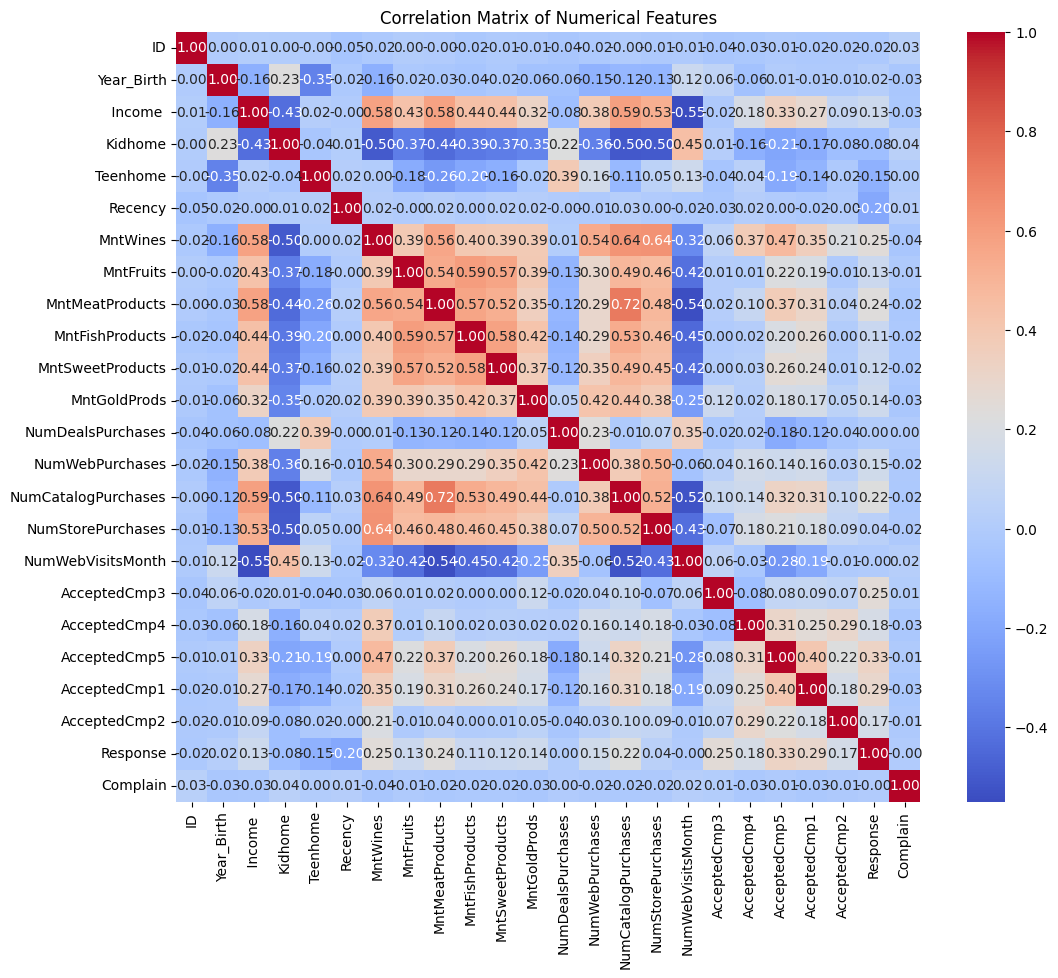

In [6]:
# Analyzing correlation between the number of web purchases and other numerical features

# Selecting numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**The heatmap provides insights into how various features correlate with the number of web purchases.
Features with higher positive or negative correlations with the number of web purchases are considered significant factors.**

**Question 3: Which marketing campaign was the most successful?**

In [7]:
# Analyzing the success of marketing campaigns

# Summing up the responses for each campaign
campaign_success = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

# Finding the most successful campaign
most_successful_campaign = campaign_success.idxmax()
most_successful_count = campaign_success.max()

print('Most Successful Campaign:', most_successful_campaign)
print('Number of Positive Responses:', most_successful_count)



Most Successful Campaign: Response
Number of Positive Responses: 334


**The success of marketing campaigns is determined by summing up the positive responses for each campaign. The Response campaign with the highest number of positive responses is identified as the most successful.**

**Question 4: What does the average customer look like?**

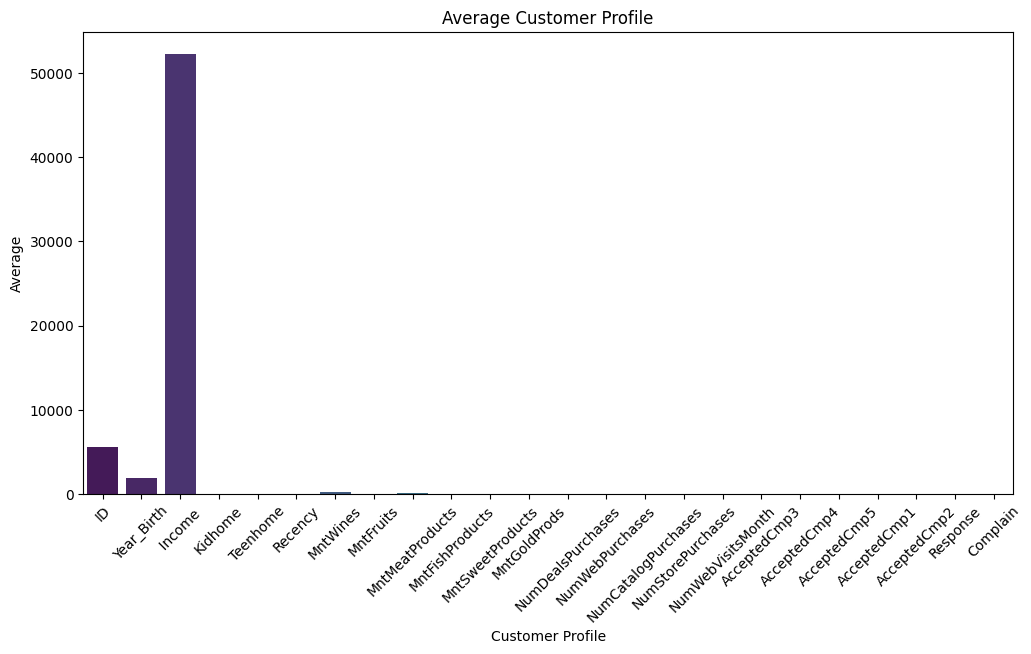

In [8]:
# Describing the average customer
average_customer = df.describe().loc['mean']

#Creating the second visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=average_customer.index, y=average_customer.values, palette='viridis')
plt.title('Average Customer Profile') #labelling the data.
plt.xlabel('Customer Profile')  #labelling the x-label.
plt.ylabel('Average') #labelling the y-label.
plt.xticks(rotation=45)
plt.show()

**The average customer profile provides insights into typical customer characteristics, including average income, spending on various products, and family composition. This information can help tailor marketing strategies to better match the needs and behaviors of the average customer.**

**Question 5: Which products are performing best?**

Best Performing Product: Wines


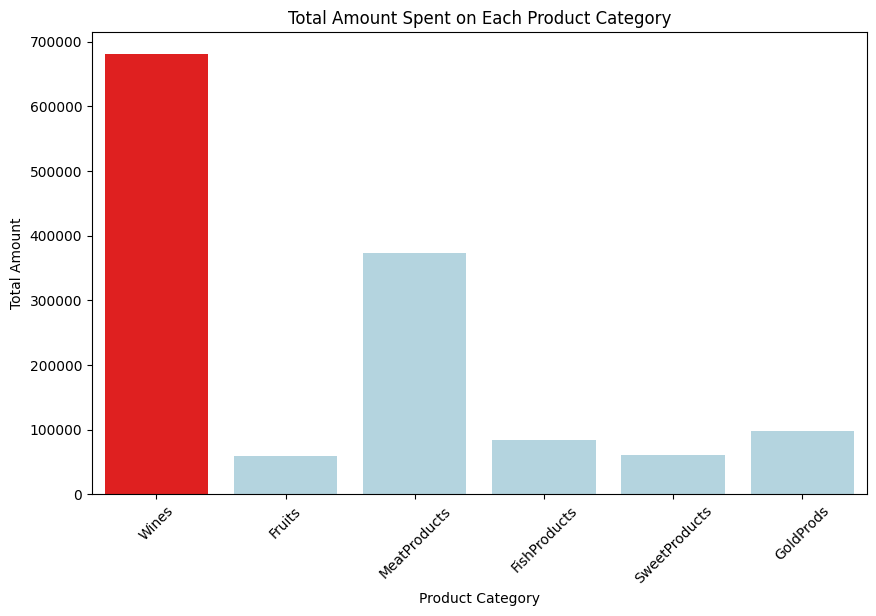

In [9]:
# Summing up the total amounts spent on each product category
products_performance = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'MeatProducts': df['MntMeatProducts'].sum(),
    'FishProducts': df['MntFishProducts'].sum(),
    'SweetProducts': df['MntSweetProducts'].sum(),
    'GoldProds': df['MntGoldProds'].sum()
}
# Convert the dictionaries to pandas Series
products_series = pd.Series(products_performance)

# Identifying the best performing product
best_performing_product = products_series.idxmax()

# Convert the Series to DataFrames for easier plotting
products_df = products_series.reset_index()
products_df.columns = ['Product', 'TotalAmount']

# Highlight colors
product_colors = ['lightblue' if product != best_performing_product else 'red' for product in products_df['Product']]

# Output the results
print(f"Best Performing Product: {best_performing_product}")

# Plotting the performance of products with highlight on the best performing product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='TotalAmount', data=products_df, palette=product_colors)
plt.title('Total Amount Spent on Each Product Category')
plt.ylabel('Total Amount')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

**The total amounts spent on each product category are summed up. where wines is the best performing product followed by meat products.**

**Question 5: Which channels are underperforming?**

Underperforming Channel: DealsPurchases


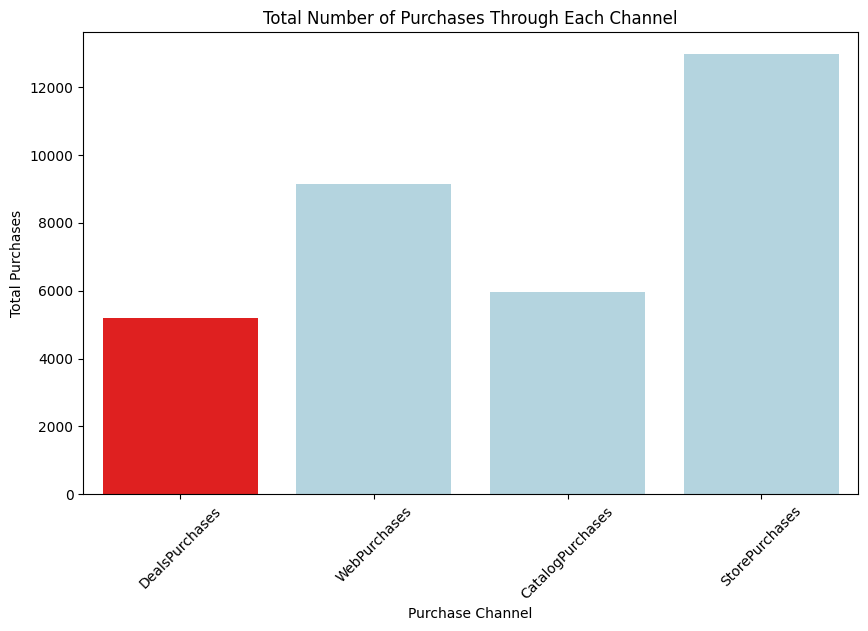

In [10]:
# Summing up the total number of purchases through each channel
channels_performance = {
    'DealsPurchases': df['NumDealsPurchases'].sum(),
    'WebPurchases': df['NumWebPurchases'].sum(),
    'CatalogPurchases': df['NumCatalogPurchases'].sum(),
    'StorePurchases': df['NumStorePurchases'].sum()
}

# Convert the dictionaries to pandas Series
channels_series = pd.Series(channels_performance)

# Identifying the underperforming channel
underperforming_channel = channels_series.idxmin()

# Convert the Series to DataFrames for easier plotting
channels_df = channels_series.reset_index()
channels_df.columns = ['Channel', 'TotalPurchases']

# Highlight colors
channel_colors = ['lightblue' if channel != underperforming_channel else 'red' for channel in channels_df['Channel']]

print(f"Underperforming Channel: {underperforming_channel}")

# Plotting the performance of channels with highlight on the underperforming channel
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='TotalPurchases', data=channels_df, palette=channel_colors)
plt.title('Total Number of Purchases Through Each Channel')
plt.ylabel('Total Purchases')
plt.xlabel('Purchase Channel')
plt.xticks(rotation=45)
plt.show()

**The total number of purchases through each channel was analyzed, and the underperforming channels are deals purchase and catalog purchase.**